# **1. 단순 선형 회귀(Linear Regression)**

## **1-1. 단순 선형 회귀 수식에서 회귀계수 w0과 w1이 의미하는 바를 각각 서술하세요.**
$f(x) = w_0 + w_1 *x$

**답안**  

- **w0**: 절편
- **w1**: 기울기

## **1-2. RSS(Residual Sum of Square)의 회귀식은 무엇을 변수로 작성되는지 서술하세요.**

$$RSS(w_0, w_1) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (w_0 + w_1 * x_i))^2$$

**답안**  
: 회귀 계수($w$) w0, w1

## **1-3. 지도학습의 유형인 분류와 회귀의 가장 큰 차이는 무엇인지 서술하세요.**

**답안**  
: 분류는 예측값이 이산형 클래스 값이고 회귀는 연속형 숫자 값이다.

# **2. 경사 하강법(Gradient Descent)**

간단한 회귀 식인 $y = 1.5x + 7$을 근사하기 위한 150개의 데이터 세트를 만들고, 여기에 `경사 하강법`을 이용해 회귀 계수 $w_1$, $w_0$을 도출하는 파이썬 코드를 작성해 봅시다.

In [ ]:
## 실행

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **2-1. 노이즈를 위한 난수를 생성해 주세요.**

In [ ]:
np.random.seed(0)

## **2-2. $y = 1.5x + 7$ 식을 근사하는 코드를 작성해 주세요.**

In [ ]:
X = 2 * np.random.rand(150,1)
y = 7 + 1.5 * X + np.random.randn(150,1)

## **2-3. X, y 데이터 세트를 산점도로 시각화 해주세요.**

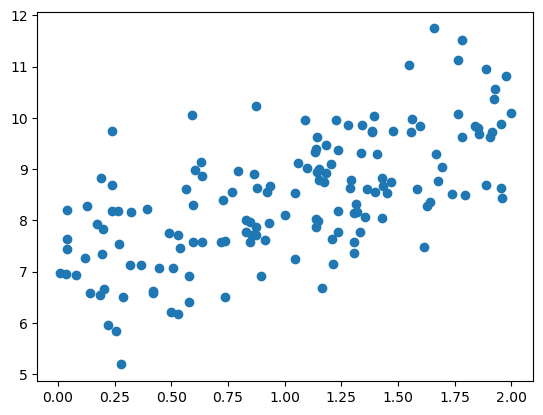

In [ ]:
plt.scatter(X, y)
plt.show()

## **2-4.**
실제 y값(y)과 예측된 y값(y_pred)을 인자로 받아 $$\frac{1}{N} \displaystyle\sum_{i=1}^{N}{(실제값_i-예측값_i)^2}$$ 식을 계산하는 비용함수 `get_cost()`를 정의하시오.

In [ ]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N

    return cost

## **2-5.**
`w1_update`로 $$-u\frac{2}{N} \displaystyle\sum_{i=1}^{N}x_1*{(예측오류_i)}$$  
`w0_update`로 $$-u\frac{2}{N} \displaystyle\sum_{i=1}^{N}{(예측오류_i)}$$ 값을 넘파이의 dot 행렬 연산으로 계산한 뒤 이를 반환하는 `get_weight_update` 함수를 정의해 주세요.

In [ ]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

## **2-6. `get_weight_update()`을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수인 `gradient_descent_steps()` 함수를 생성해 주세요.**

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 -= w1_update
        w0 -= w0_update

    return w1, w0

## **2-7. `gradient_descent_steps()`를 호출해 w1과 w0를 구해보세요. 그리고 앞서 정의한 `get_cost()` 함수를 이용해 경사 하강법의 예측 오류를 계산해 보세요.**

In [ ]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
y_pred = w1[0,0] * X + w0

print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:1.589 w0:6.790
Gradient Descent Total Cost:0.8550


## **2-8. `y_pred`에 기반해 회귀선을 그려보세요.**

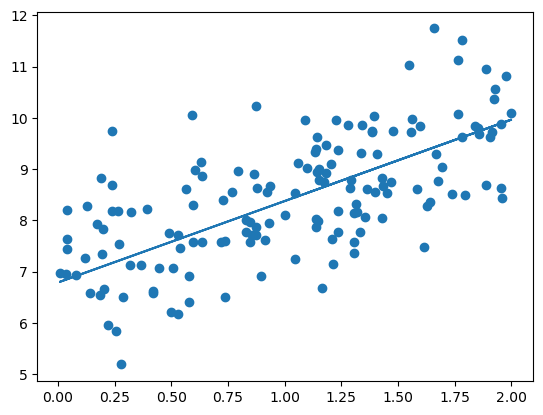

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)

plt.show()

# **3. 확률적 경사 하강법**

위 데이터를 기반으로 일부 데이터만 이용해 w가 업데이트되는 값을 계산하는 `확률적 경사 하강법`을 이용하여 회귀 계수 $w_1$, $w_0$을 도출하는 파이썬 코드를 작성해 봅시다.

## **3-1. 확률적 경사 하강법을 구현한 `stochastic_gradient_descent_steps()`함수를 생성해 주세요.**

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        np.random.seed(ind)

        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 추출된 데이터 기반으로 weight 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

## **3-2. 위 함수 `stochastic_gradient_descent_steps()`를 실행해 w1, w0 및 예측 오차 비용을 계산해 보세요.**

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
y_pred = np.dot(X, w1) + w0

print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
print("Stochastic Gradient Descent Total Cost: {:.4f}".format(get_cost(y, y_pred)))

w1: 1.61 w0: 6.766
Stochastic Gradient Descent Total Cost: 0.8575


## **3-3. `y_pred`를 활용하여 실제 데이터와 회귀선을 함께 시각화해 보세요.**

X와 y는 실제 데이터, `y_pred`는 확률적 경사 하강법(Stochastic Gradient Descent)으로 예측한 값입니다.
세 값을 하나의 그래프에 시각화하여 결과를 도출해 봅시다.

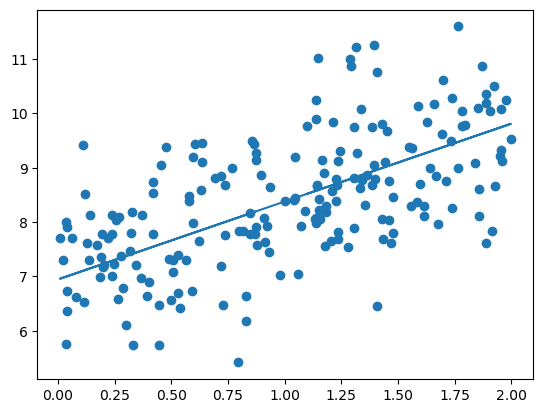

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

plt.show()

# **4. diamonds 데이터셋을 이용한 회귀 실습**

seaborn의 diamonds 데이터셋을 사용해 진행합니다. 아래 셀들을 실행해 모듈과 데이터셋을 로드해주세요.

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

dm = sns.load_dataset('diamonds')


In [ ]:
dm.head() # feature 확인용

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## **4-1. 수치형 변수들로 산점도와 선형회귀 직선 그리기**

수치형 변수 carat, depth, table, x, y, z 총 6개의 변수들과 price의 관계를 알아보기 위해 시각화합니다.

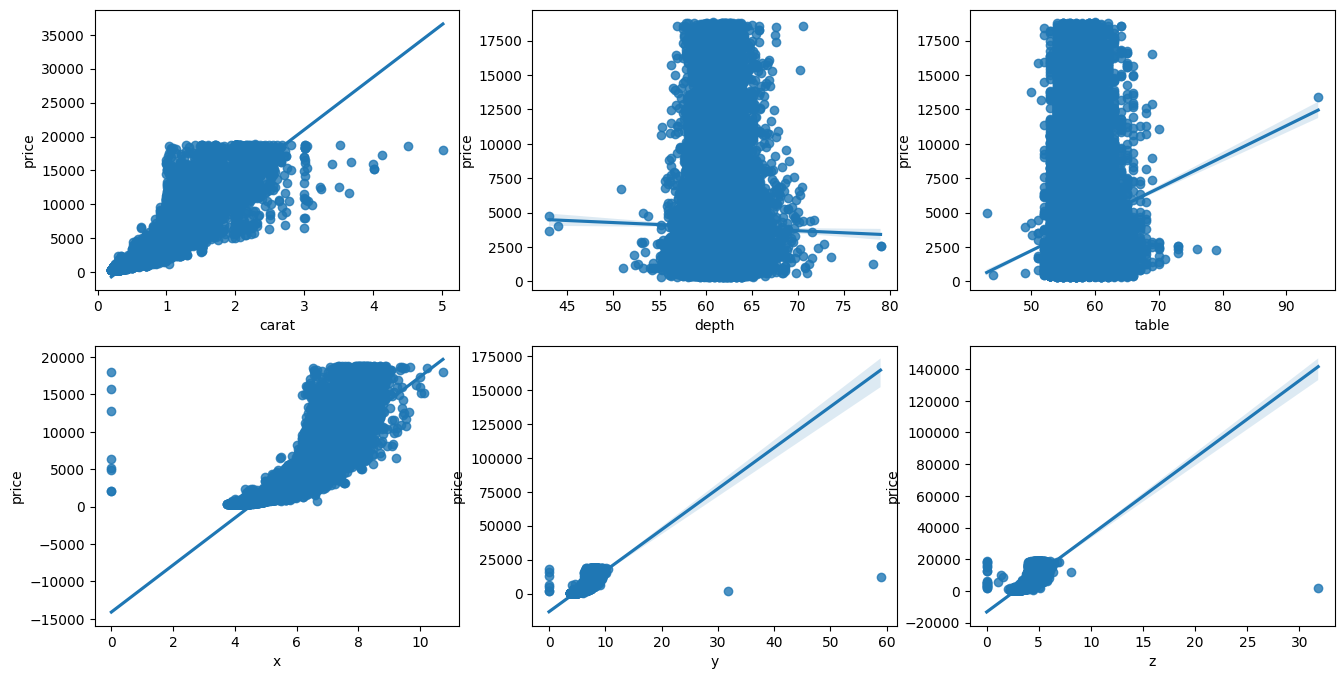

In [ ]:
fig,axs = plt.subplots(figsize = (16,8), ncols=3, nrows = 2)
dm_features = ['carat', 'depth', 'table',  'x', 'y','z']

for i, feature in enumerate(dm_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x=feature,y='price',data=dm,ax=axs[row][col])

## **4-2. 다이아몬드 가격의 선형 회귀 모델 만들기**





수치형 변수들에 대해 선형 회귀 모델을 만듭니다.

In [4]:
y_target = dm['price']
X_data = dm[['carat', 'depth', 'table',  'x', 'y','z']]

X_train, X_test, y_train, y_test = train_test_split(X_data,y_target, test_size=0.3,
                                                    random_state=156)

In [5]:
# 선형회귀모델 만들기
model = LinearRegression()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

## **4-3. 만든 선형 회귀모델에 대해 MSE, RMSE, R2을 통해 평가해주세요.**


In [ ]:
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
R2_score = r2_score(y_test,y_preds)

print('mse : {} \nrmse : {} \nr2_score : {}'.format(mse,rmse,R2_score))

mse : 2196809.5656454167 
rmse : 1482.1638120145212 
r2_score : 0.8597245333998415


## **4-4. 회귀모델의 절편, 회귀계수값을 확인해주세요.**

In [ ]:
# 절편값, 회귀계수값 확인하기

print('절편값: ', model.intercept_)
print('회귀계수값:', np.round(model.coef_,1))

절편값:  20898.787359062022
회귀계수값: [10652.3  -206.6   -99.8 -1342.6    64.8    98.8]


## **4-5. cross_val_score를 통해 모델의 교차검증을 진행해주세요. 이 때 평가 지표는 mse와 rmse입니다.**


In [ ]:
# cross_val_score로 교차검증하기

from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(model,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)

print('5 folds 의 MSE scores:', np.round(neg_mse_scores,2))
print('5 folds 의 RMSE scores:', np.round(rmse_scores,2))

5 folds 의 MSE scores: [ -1937733.8   -3139262.32 -11750783.15   -215220.13   -593214.31]
5 folds 의 RMSE scores: [1392.03 1771.8  3427.94  463.92  770.2 ]


# **5. sine + noise 함수를 이용한 다항회귀 실습**


## **5-1. 실습에 활용할 함수를 정의하세요.**


In [ ]:
# 회귀의 정답 함수 ( sin(2πx))
def true_fun(x):
    return np.sin(2 * np.pi * x)

# 회귀에 활용할 함수

n_samples = 100
X = np.sort(np.random.rand(n_samples))

y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1

## **5-2. `PolynomialFeatures`, `LinearRegression`,`Pipeline` 을 이용해 다항회귀 실습을 진행해주세요.**

* degree = 4로 설정해주세요.
* 모델에 fit까지 해주세요.





In [ ]:
pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=4, include_bias=False)),
                         ("linear_regression", LinearRegression())])
pipeline.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

## **5-2. 연결한 pipeline을 활용해 예측을 진행해주세요.**


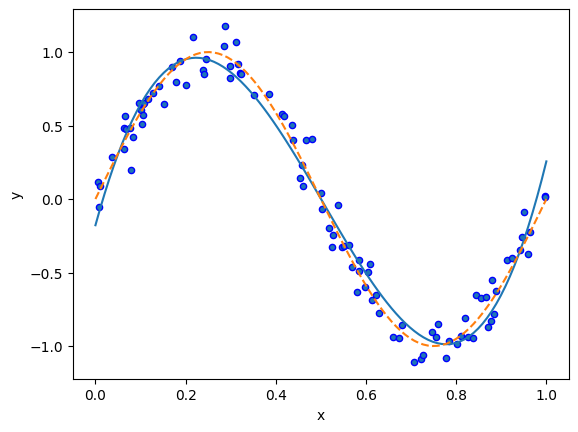

In [ ]:
# 0부터 1을 100으로 나눠 테스트 데이터 셋 생성
X_test = np.linspace(0,1,100)

# 예측값 곡선 그리기
plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label="Predict")
# 실제값 곡선 그리기
plt.plot(X_test,true_fun(X_test),'--',label = "true function")
plt.scatter(X,y,edgecolor='b',s=20,label="samples")

plt.xlabel("x")
plt.ylabel("y")
plt.show()

## **5-3. 편향 분산 트레이드 오프**
좌측은 degree를 20으로 설정했을 때, 우측은 degree를 1로 설정했을 때의 시각화 이미지입니다.

5-2의 답안(degree=4)일 때의 시각화 이미지와 비교하여 1) 과소적합/과대적합이 언제 일어나는지, 2) 최적의 모델은 언제 형성되는지 편향분산 트레이드오프 개념을 이용해 설명하세요.


![](https://drive.google.com/uc?export=view&id=18BPKjUAImEekRvULNBiBEV2V7eTD839k)


degree = 1일 때는 매우 단순화된 모델로 지나치게 편향되어있어 고편향을 가지고 있습니다. degree = 20일 때는 학습 데이터의 특성을 지나치게 반영해 고분산성을 가지고 있습니다. 따라서 편향이 높고 분산이 작으면 과소적합, 편향이 작고 분산이 높으면 과대적합이 일어난다고 볼 수 있습니다. 편향분산 트레이드 오프는 편향과 분산이 한쪽이 높으면 한쪽이 낮아지는 개념을 말하며, 최적의 모델은 둘 다 적당히 낮아 에러값이 최저인 지점에서 생성됩니다.

# **6. 규제 선형 회귀**


California Housing 데이터셋을 사용합니다.


### **6-1. 데이터를 로드하고 스케일링/분할해주세요.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
california = fetch_california_housing()
californiaDF = pd.DataFrame(california.data, columns = california.feature_names)
californiaDF['PRICE'] = california.target

y_target = californiaDF['PRICE']
X_data = californiaDF.drop(['PRICE'], axis=1,inplace=False)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# 훈련/테스트 세트 분할 (test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)

### **6-2. 릿지 회귀를 수행하세요.**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha 값 리스트로 릿지 회귀 모델 생성 후
# cross_val_score를 이용해 RMSE 평균 출력 (cv=5)

alphas = [0.01, 0.1, 1, 10]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse = cross_val_score(ridge, X_scaled, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-neg_mse))
    print(f'alpha {alpha} 일 때 평균 RMSE = {avg_rmse}')


alpha 0.01 일 때 평균 RMSE = 0.7459067736446681
alpha 0.1 일 때 평균 RMSE = 0.7459062101326916
alpha 1 일 때 평균 RMSE = 0.7459006592292844
alpha 10 일 때 평균 RMSE = 0.7458534119763469


### **6-3. 라쏘 회귀를 수행한 후, 릿지 회귀와 라쏘 회귀의 차이점을 서술해주세요.**

In [ ]:
from sklearn.linear_model import Lasso

# 위 문제와 동일한 alpha 값 리스트로 라쏘 회귀 모델 생성 후
# cross_val_score를 이용해 RMSE 평균 출력 (cv=5)

for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    neg_mse = cross_val_score(lasso, X_scaled, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-neg_mse))
    print(f'alpha {alpha}: 평균 RMSE = {avg_rmse}')

alpha 0.01: 평균 RMSE = 0.7479044660419341
alpha 0.1: 평균 RMSE = 0.8423386662419432
alpha 1: 평균 RMSE = 1.1689190658050883
alpha 10: 평균 RMSE = 1.1689190658050883


답변 : **릿지 회귀는 L2 규제를, 라쏘 회귀는 L1 규제를 사용한다.** 따라서 릿지 회귀는 회귀계수 가중치의 제곱합을 최소화하는 목적 함수를 가지고, 라쏘 회귀는 회귀 계수의 절댓값을 최소화하는 목적함수를 가진다. 이에 따른 두 모델의 가장 큰 차이점은 라쏘 회귀에서는 일부 회귀계수를 완전히 0으로 만드는 과정을 통해 변수 선택의 효과가 나타난다는 점이다.

### **6-4. 엘라스틱넷 회귀를 수행하세요.**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# L1규제 계수를 0.07, L2규제 계수를 0.03으로 설정
elastic = ElasticNet(alpha=0.1, l1_ratio=0.7) # alpha = L1 + L2, l1_ratio = L1의 비율
elastic.fit(X_train, y_train)

# 테스트 세트 예측 및 RMSE 계산
y_pred = elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'ElasticNet RMSE: {rmse:.3f}')

ElasticNet RMSE: 0.755


# **7. 로지스틱 회귀**

위스콘신 유방암 데이터셋을 사용합니다.


## **7-1. 데이터를 로드하고 MinMax 스케일링을 진행하세요.**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 스케일링
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

### **7-2. 로지스틱 회귀에서 여러 solver를 이용해 학습 및 예측을 수행하세요.**

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test,lr_preds_proba)))

solver:lbfgs, accuracy: 0.953, roc_auc:0.995
solver:liblinear, accuracy: 0.947, roc_auc:0.994
solver:newton-cg, accuracy: 0.953, roc_auc:0.995
solver:sag, accuracy: 0.953, roc_auc:0.995
solver:saga, accuracy: 0.953, roc_auc:0.995


### **7-3. GridSearchCV를 이용해 최적의 penalty와 C값을 찾고, 각 파라미터의 역할을 서술하세요.**

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# C = [0.01, 0.1, 1, 5, 10]
params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(X_train, y_train)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 5, 'penalty': 'l2'}, 최적 평균 정확도:0.977


답변 : C 파라미터는 규제 강도를 조절하는 하이퍼파라미터로, alpha 값의 역수를 나타낸다. 따라서 이 값이 작을수록 규제 강도가 커진다. <br>
penalty는 L1규제 또는 L2 규제로, 규제 유형을 설정한다.<br>
위 최적화 결과에서는 계수가 1/5=0.2인 L2규제가 최적의 하이퍼 파라미터로 계산되었다.

# **8 회귀 트리**

당뇨병 데이터셋을 사용합니다.


### **8-1. 데이터를 로드하고 분할하세요.**

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 로드
diabetes = load_diabetes()
diabetesDF = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetesDF['target'] = diabetes.target

y = diabetesDF['target']
X = diabetesDF.drop(['target'], axis=1,inplace=False)

# StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련/테스트 세트 분할 (test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

### **8-2. 선형 회귀와 결정 트리 기반의 모델을 각각 생성하고 시각화를 위한 피쳐를 추출하세요.**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth=2
lr_reg = LinearRegression()
tr_reg = DecisionTreeRegressor(max_depth=2)

# 실제 예측을 적용할 테스트용 데이터 셋 생성 (bmi 범위: -0.1~0.1에서 0.002간격으로)
X_test = np.arange(-0.1, 0.1, 0.002).reshape(-1, 1)

# 당뇨병 데이터에서 시각화를 위해 피처는 bmi만, 결정 데이터는 target 추출
diabetes_sample = diabetesDF[['bmi', 'target']].sample(n=100, random_state=0)
X_feature = diabetes_sample['bmi'].values.reshape(-1,1)
y_target = diabetes_sample['target'].values.reshape(-1,1)

### **8-3. 각 회귀 모델으로 학습과 예측을 수행하세요.**

In [ ]:
lr_reg.fit(X_feature, y_target)
tr_reg.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_tr = tr_reg.predict(X_test)

### **8-4 추출한 피쳐와 모델이 예측한 회귀선을 함께 시각화하세요.**

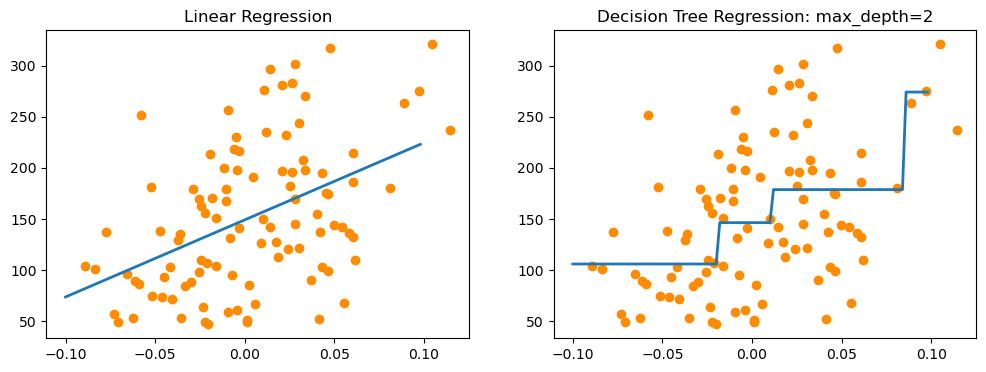

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(12,4), ncols=2)

ax1.set_title('Linear Regression')
ax1.scatter(diabetes_sample.bmi, diabetes_sample.target, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

ax2.set_title('Decision Tree Regression: max_depth=2')
ax2.scatter(diabetes_sample.bmi, diabetes_sample.target, c="darkorange")
ax2.plot(X_test, pred_tr, label="max_depth=2", linewidth=2)